## Principal Component Analysis

### Introduction
If you’ve worked with a lot of variables before, you know this can present problems. Do you understand the relationships between each variable? Do you have so many variables that you are in danger of overfitting* your model to your data or that you might be violating assumptions of whichever modeling tactic you’re using?

You might ask the question, “How do I take all of the variables I’ve collected and focus on only a few of them?” In technical terms, you want to “reduce the dimension of your feature space.” By reducing the dimension of your feature space, you have fewer relationships between variables to consider and you are less likely to overfit your model. *(Note: This doesn’t immediately mean that overfitting, etc. are no longer concerns — but we’re moving in the right direction!)*

\***overfitting** *means creating a model that matches (memorizes) the training set so closely that the model fails to make correct predictions on new data. An overfit model is analogous to an invention that performs well in the lab but is worthless in the real world.*

Somewhat unsurprisingly, **reducing** the **dimension** of the feature space is called “**dimensionality reduction**”. There are many ways to achieve dimensionality reduction, but most of these techniques fall into one of two classes:

* Feature Elimination
* Feature Extraction

### Feature elimination
**Feature elimination** is what it sounds like: we reduce the feature space by eliminating features. Instead of considering every single variable, we might drop all variables except the three we think will best predict the target variable.

**Advantages** of feature elimination methods include simplicity and maintaining interpretability of your variables.

As a **disadvantage**, though, you gain no information from those variables you’ve dropped. By eliminating features, we’ve also entirely eliminated any benefits those dropped variables might bring.

### Feature extraction
**Feature extraction**, however, doesn’t run into this problem. Say we have ten independent variables. In feature extraction, we create ten “new” independent variables, where each “new” independent variable is a combination of each of the ten “old” independent variables. However, we create these new independent variables in a specific way and order these new variables by how well they predict our dependent variable.

You might say, “Where does the dimensionality reduction come into play?” Well, we keep as many of the new independent variables as we want, but we drop the “least important ones.” Because we ordered the new variables by how well they predict our dependent variable, we know which variable is the most important and least important. But — and here’s the kicker — because these new independent variables are combinations of our old ones, we’re still keeping the most valuable parts of our old variables, even when we drop one or more of these “new” variables!

### Principal component analysis
Principal component analysis is a technique for feature extraction — so it combines our input variables in a specific way, then we can drop the “least important” variables while still retaining the most valuable parts of all of the variables! *As an added benefit, each of the “new” variables after PCA are all independent of one another.*

This is a benefit because the [assumptions of a linear model](https://people.duke.edu/~rnau/testing.htm) require our independent variables to be independent of one another. If we decide to fit a linear regression model with these “new” variables, this assumption will necessarily be satisfied.

### How does PCA work?

1. Calculate a matrix that summarizes how our variables all relate to one another.

2. Break this matrix down into two separate components: **direction** and **magnitude**. We can then understand the “directions” of our data and its “magnitude” (or how “important” each direction is).

The screenshot below, from the [setosa.io applet](https://setosa.io/ev/principal-component-analysis/), displays the two main directions in this data: the “red direction” and the “green direction.” In this case, the “red direction” is the more important one. We’ll get into why this is the case later, but given how the dots are arranged, can you see why the “red direction” looks more important than the “green direction?” *(Hint: What would fitting a line of best fit to this data look like?)*

![PCA Direction & Magnitude](img/pca_direction_magnitude.png)

3. Transform our original data to align with these important directions (which are combinations of our original variables). The screenshot below is the same exact data as above, but transformed so that the $x$- and $y$-axes are now the “red direction” and “green direction.” What would the line of best fit look like here?

![PCA Direction & Magnitude 2](img/pca_direction_magnitude_2.png)

*Figure: Our original data transformed by PCA.*

4. While the visual example here is two-dimensional (and thus we have two “directions”), think about a case where our data has more dimensions. By identifying which “directions” are most “important,” we can compress or project our data into a smaller space by dropping the “directions” that are the “least important.” **By projecting our data into a smaller space, we’re reducing the dimensionality of our feature space… but because we’ve transformed our data in these different “directions,” we’ve made sure to keep all original variables in our model!**

### PCA implementation

Here, I walk through an algorithm for conducting PCA. I try to avoid being too technical, but it’s impossible to ignore the details here.

Before starting, you should have tabular data organized with $n$ rows and likely $p+1$ columns, where **one** column corresponds to your dependent variable (usually denoted $Y$) and $p$ columns where each corresponds to an independent variable (the matrix of which is usually denoted $X$).

1. If a $Y$ variable exists and is part of your data, then separate your data into $Y$ and $X$, as defined above — we’ll mostly be working with $X$. *(Note: if there exists no column for $Y$, that’s okay — skip to the next point!)*

2. Take the matrix of independent variables $X$ and, for each column, subtract the mean of that column from each entry. *(This ensures that each column has a mean of zero.)*

3. Decide whether or not to standardize. Given the columns of $X$, are features with **higher variance** more important than features with **lower variance**, or is the importance of features independent of the variance? (In this case, **importance** means how well that feature predicts $Y$.) If the importance of features is independent of the variance of the features, then divide each observation in a column by that column’s standard deviation. *(This, combined with step 2, standardizes each column of $X$ to make sure each column has mean $=0$ and standard deviation $=1$.)* Call the centered (and possibly standardized) matrix $Z$.

4. Take the matrix $Z$, [transpose it](https://chortle.ccsu.edu/VectorLessons/vmch13/vmch13_14.html), and multiply the transposed matrix by $Z$. (Writing this out mathematically, we would write this as $Z^TZ$.) The resulting matrix is the [covariance matrix](https://www.itl.nist.gov/div898/handbook/pmc/section5/pmc541.htm) of $Z$, up to a constant.

5. *(This is probably the toughest step to follow — stick with me here.)* Calculate the **eigenvectors** and their corresponding **eigenvalues** of $Z^TZ$. This is quite easily done in most computing packages — in fact, the **eigendecomposition** of $Z^TZ$ is where we decompose $Z^TZ$ into $PDP^{-1}$, where $P$ is the matrix of eigenvectors and $D$ is the diagonal matrix with eigenvalues on the diagonal and values of zero everywhere else. The eigenvalues on the diagonal of $D$ will be associated with the corresponding column in $P$ — that is, the first element of $D$ is $λ_1$ and the corresponding eigenvector is the first column of $P$. This holds for all elements in $D$ and their corresponding eigenvectors in $P$. We will always be able to calculate $PDP{-1}$ in this fashion.

6. Take the eigenvalues $λ_1, λ_2, …, λ_p$ and sort them from largest to smallest. In doing so, sort the eigenvectors in $P$ accordingly. (For example, if $λ_2$ is the largest eigenvalue, then take the second column of $P$ and place it in the first column position.) Depending on the computing package, this may be done automatically. Call this sorted matrix of eigenvectors $P*$. (The columns of $P*$ should be the same as the columns of P, but perhaps in a different order.) **Note that these eigenvectors are independent of one another.**

7. Calculate $Z* = ZP*$. This new matrix, $Z*$, is a centered/standardized version of $X$ but now each observation is a combination of the original variables, where the weights are determined by the eigenvector. **As a bonus, because our eigenvectors in $P*$ are independent of one another, each column of $Z*$ is also independent of one another!**

![PCA Example](img/pca_example.png)

Note two things in this graphic:

* The two charts show the exact same data, but the right graph reflects the original data transformed, so that our axes are now the principal components.

* In both graphs, the principal components are perpendicular to one another. In fact, every principal component will ALWAYS be orthogonal to every other principal component.

**Because our principal components are orthogonal to one another, they are statistically linearly independent of one another… which is why our columns of Z* are linearly independent of one another!**

8. Finally, we need to determine how many features to keep versus how many to drop. There are three common methods to determine this, discussed below and followed by an explicit example:

* **Method 1**: We arbitrarily select how many dimensions we want to keep. Perhaps I want to visually represent things in two dimensions, so I may only keep two features. This is use-case dependent and there isn’t a hard-and-fast rule for how many features I should pick.

* **Method 2**: Calculate the [proportion of variance explained](https://stats.stackexchange.com/questions/22569/pca-and-proportion-of-variance-explained) for each feature, pick a threshold, and add features until you hit that threshold. *(For example, if you want to explain 80% of the total variability possibly explained by your model, add features with the largest explained proportion of variance until your proportion of variance explained hits or exceeds 80%.)*

* **Method 3**: This is closely related to Method 2. Calculate the proportion of variance explained for each feature, sort features by proportion of variance explained and plot the cumulative proportion of variance explained as you keep more features. (This plot is called a [scree plot](https://ba-finance-2013.blogspot.com/2012/09/scree-plots-interpretation-and.html), shown below.) One can pick how many features to include by identifying the point where adding a new feature has a significant drop in variance explained relative to the previous feature, and choosing features up until that point. *(I call this the “find the elbow” method, as looking at the “bend” or “elbow” in the scree plot determines where the biggest drop in proportion of variance explained occurs.)*

Because each eigenvalue is roughly the importance of its corresponding eigenvector, the proportion of variance explained is the sum of the eigenvalues of the features you kept divided by the sum of the eigenvalues of all features.

![PCA Variance - scree plot of genetic data](img/pca_variance.png)

The red line indicates the proportion of variance explained by each feature, which is calculated by taking that principal component’s eigenvalue divided by the sum of all eigenvalues. The proportion of variance explained by including only principal component $1$ is $λ_1/(λ_1 + λ_2 + … + λ_p)$, which is about $23%$. The proportion of variance explained by including only principal component $2$ is $λ_2/(λ_1 + λ_2 + … + λ_p)$, or about $19%$.

The proportion of variance explained by including both principal components $1$ and $2$ is $(λ_1 + λ_2)/(λ_1 + λ_2 + … + λ_p)$, which is about $42%$. This is where the yellow line comes in; the yellow line indicates the cumulative proportion of variance explained if you included all principal components up to that point.

Now let’s go through some examples:

* **Method 1**: We arbitrarily select a number of principal components to include. Suppose I wanted to keep five principal components in my model. In the genetic data case above, these five principal components explains about $66%$ of the total variability that would be explained by including all $13$ principal components.

* **Method 2**: Suppose I wanted to include enough principal components to explain $90%$ of the total variability explained by all $13$ principal components. In the genetic data case above, I would include the first $1$ principal components and drop the final three variables from $Z*$.

* **Method 3**: Here, we want to “find the elbow.” In the scree plot above, we see there’s a big drop in proportion of variability explained between principal component $2$ and principal component $3$. In this case, we’d likely include the first two features and drop the remaining features. As you can see, this method is a bit subjective as “elbow” doesn’t have a mathematically precise definition and, in this case, we’d include a model that explains only about $42%$ of the total variability.

Once we’ve dropped the transformed variables we want to drop, we’re done! That’s PCA.

### Why does PCA work?
While PCA is a very technical method relying on in-depth linear algebra algorithms, it’s a relatively intuitive method when you think about it.

* First, the covariance matrix $Z^TZ$ is a matrix that contains estimates of how every variable in $Z$ relates to every other variable in $Z$. Understanding how one variable is associated with another is quite powerful.

* Second, eigenvalues and eigenvectors are important. **Eigenvectors represent directions**. Think of plotting your data on a multidimensional scatterplot. Then one can think of an individual eigenvector as a particular “direction” in your scatterplot of data. **Eigenvalues represent magnitude**, or importance. Bigger eigenvalues correlate with more important directions.

* Finally, we make an assumption that more variability in a particular direction correlates with explaining the behavior of the dependent variable. Lots of variability usually indicates signal, whereas little variability usually indicates noise. Thus, the more variability there is in a particular direction is, theoretically, indicative of something important we want to detect.

Thus, PCA is a method that brings together:

1. A measure of how each variable is associated with one another. (Covariance matrix.)

2. The directions in which our data are dispersed. (Eigenvectors.)

3. The relative importance of these different directions. (Eigenvalues.)

PCA combines our predictors and allows us to drop the eigenvectors that are relatively unimportant.

### Are there extensions to PCA?

Yes, more than I can address here in a reasonable amount of space. The one I’ve most frequently seen is **principal component regression**, where we take our untransformed $Y$ and regress it on the subset of $Z*$ that we didn’t drop. (This is where the independence of the columns of $Z*$ comes in; by regressing $Y$ on $Z*$, we know that the required independence of independent variables will necessarily be satisfied. However, we will need to still check our other assumptions.)

The other commonly-seen variant I’ve seen is [kernel PCA](https://en.wikipedia.org/wiki/Kernel_principal_component_analysis).

---
* Show some applications of PCA, e.g. reducing a 3D image to its first 2 principal components, plotting the 3D and 2D images
* Show a practical use of PCA, for example, trying to see features in a 15D space, projected in 3D.
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

##### Step 1 - Load the data
We have a list of 1177 vehicles, manufactured between 1993 and 2025. We have 4 features and 1 target attribute (**price**). We are trying to develop a model that predicts price based on other vehicle features.

In [2]:
# Read a dataset with 1177 vehicles data and their respective market price
data = pd.read_csv('data/mercedes_c220.csv')

# Show the top 5 rows
data.head()

,years,km,hp,transmission,price
0,18,185000,150,2,500
1,23,281397,143,1,750
2,29,300000,95,1,850
3,25,383873,125,2,950
4,20,373000,150,1,1112


In [3]:
# Provide some statistical overview, needed for the feature scaling (normalization).
data.describe()

,years,km,hp,transmission,price
count,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000
mean,14.723874,226318.264231,165.182668,1.738318,9729.793543
std,5.543678,68232.120371,17.739607,0.439737,8715.158180
min,1.000000,6200.000000,95.000000,1.000000,500.000000
25%,10.000000,190000.000000,150.000000,1.000000,4400.000000
50%,15.000000,224000.000000,170.000000,2.000000,6750.000000
75%,18.000000,263285.000000,170.000000,2.000000,13425.000000
max,32.000000,473890.000000,270.000000,2.000000,62327.000000


##### Step 2 - Preprocess the Dataset
As a next step, let's preprocess the dataset. The features are all on different scales. To bring them all to a common scale, we’ll use the StandardScaler that transforms the features to have zero mean and unit variance:

In [4]:
std_scaler = StandardScaler()
scaled_data = std_scaler.fit_transform(data.drop(['price'],axis=1)) # Do not include the last column "price", since it is a *target* attribute.

scaled_data[0]

array([ 0.59121733, -0.60581186, -0.85622652,  0.59534056])

##### Step 3 – Perform PCA on the Preprocessed Dataset
To find the principal components, we can use the PCA class from **scikit-learn** library. Let’s instantiate a PCA object by passing in the number of principal components n_components to the constructor. The number of principal components is the number of dimensions that you’d like to reduce the feature space to. Here, we set the number of components to 2. 

In [5]:
pca = PCA(n_components=2)
pca.fit_transform(scaled_data)

array([[ 0.31080643,  0.50496613],
       [ 2.55908708, -0.84186835],
       [ 4.79762338, -0.19186376],
       ...,
       [-3.97282991, -1.18485667],
       [-3.92894048, -1.21580729],
       [-4.08368019, -1.19068059]], shape=(1177, 2))

##### Step 4 – Examining Some Useful Attributes of the PCA Object
The PCA instance `pca` that we created has several useful attributes that help us understand what is going on under the hood.

The attribute `components_` stores the **directions of maximum variance** (the principal components).

In [6]:
print(pca.components_)

[[ 0.59048763  0.46971228 -0.54343379 -0.36793267]
 [ 0.11281222  0.38455307 -0.15625064  0.90276136]]


We mentioned that the principal components are directions of maximum variance in the dataset. But how do we measure how much of the total variance is captured in the number of principal components we just chose?

The `explained_variance_ratio_` attribute captures the ratio of the total variance each principal component captures. Sowe can sum up the ratios to get the total variance in the chosen number of components.

In [7]:
print(sum(pca.explained_variance_ratio_))

0.7947658152978833


Here, we see that two principal components capture over $$ of total variance in the dataset.

##### Step 5 – Analyzing the Change in Explained Variance Ratio
We can try running principal component analysis by varying the number of components `n_components`.

In [8]:
nums = np.arange(5)

var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(scaled_data)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

To visualize the `explained_variance_ratio_` for the number of components, let’s plot the two quantities as shown:

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

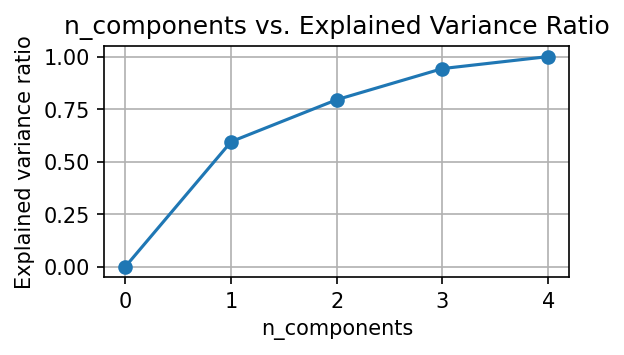

In [9]:
plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

When we use all the 4 components, the `explained_variance_ratio_` is $1.0$ indicating that we’ve captured $100%$ of the variance in the dataset. 

In this example, we see that with 3 principal components, we'll be able to capture more than 94% of variance in the input dataset.

### References

* [A One-Stop Shop for Principal Component Analysis](https://medium.com/data-science/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c)